In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('fivethirtyeight')

# Store Data

In [3]:
from acquire import get_all_store_data
from prepare import wrangle_sales

In [4]:
sales = get_all_store_data()

In [5]:
sales = wrangle_sales(sales)

# Let's use the last year as the test data, and everything before it for the train

In [6]:
train = sales[:'2016']
test  = sales['2017']

In [7]:
X_train = train[['sales_total']]
X_validate = test[['sales_total']]

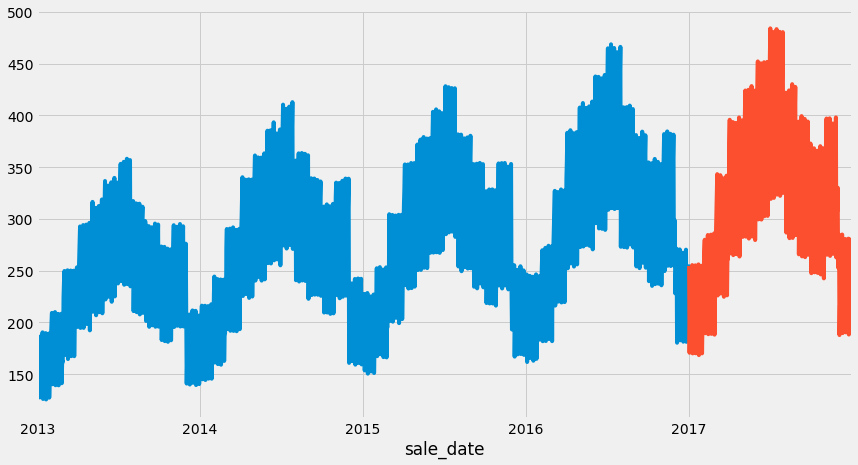

In [8]:
train.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot()

In [9]:
y = train.resample('D').sales_total.mean()

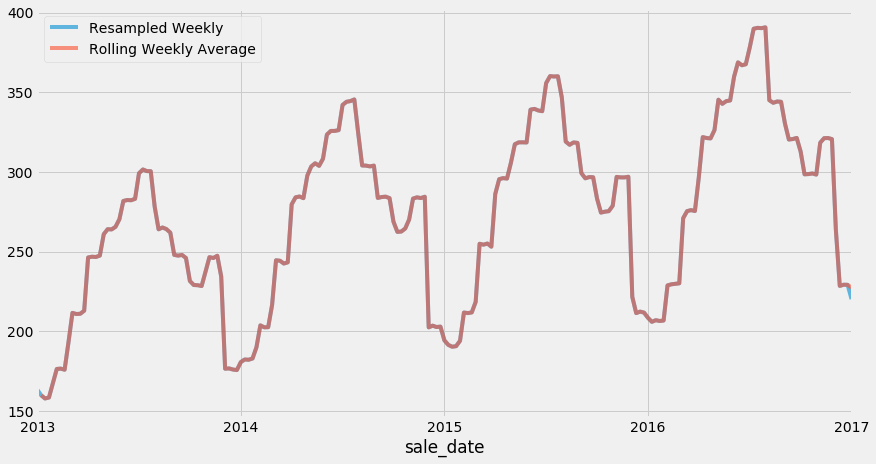

In [10]:
y.resample('W').mean().plot(label='Resampled Weekly', alpha=.6)
y.rolling(7).mean().plot(label='Rolling Weekly Average', alpha=.6)
plt.legend()

Text(0, 0.5, 'Difference in sales from one day to the next')

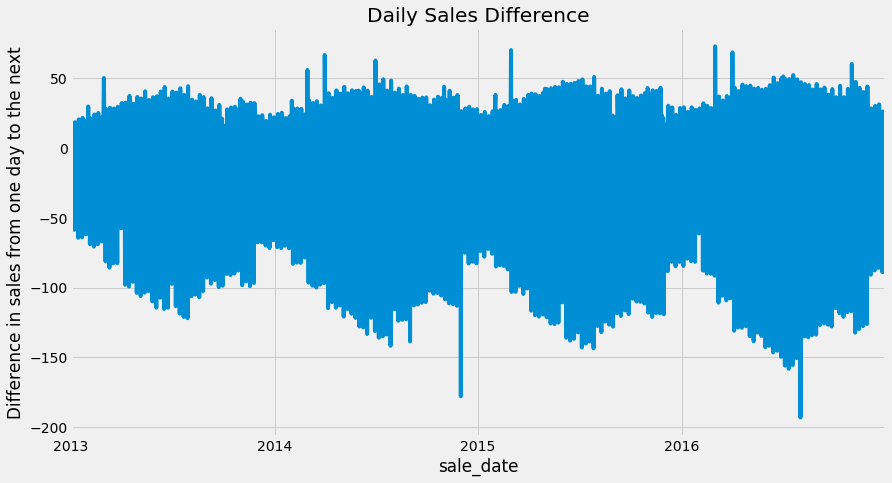

In [11]:
y.diff().plot()
plt.title('Daily Sales Difference')
plt.ylabel('Difference in sales from one day to the next')

Text(0, 0.5, '% Change')

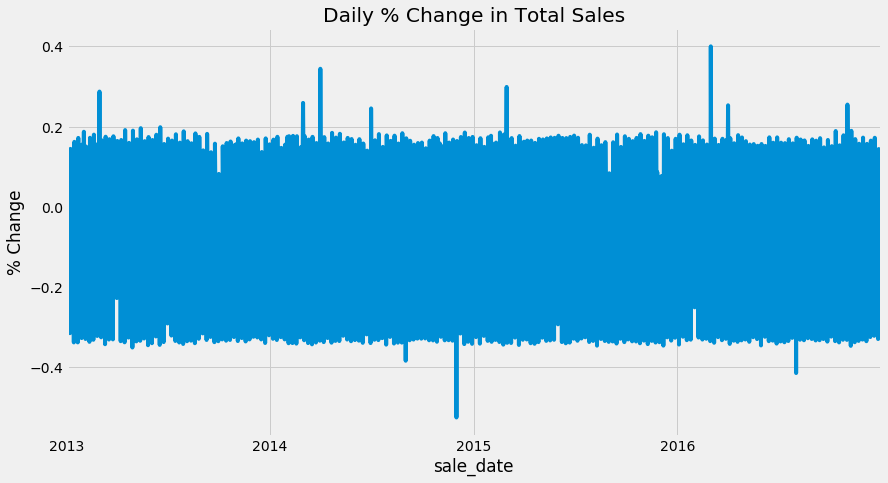

In [12]:
(y.diff() / y.shift()).plot()
plt.title('Daily % Change in Total Sales')
plt.ylabel('% Change')

[Text(0.5, 1.0, 'Monthly % Change in Total Sales')]

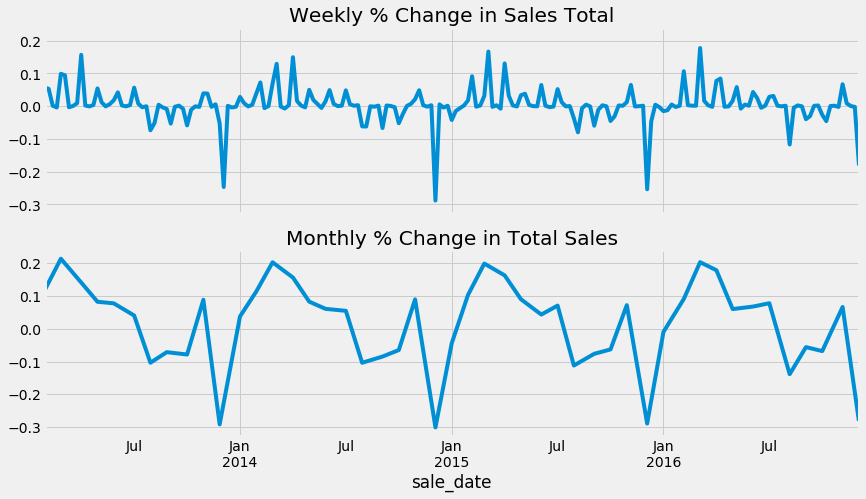

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

weekly = y.resample('W').mean()
(weekly.diff() / weekly.shift()).plot(ax=ax1)
ax1.set(title='Weekly % Change in Sales Total')

monthly = y.resample('M').mean()
(monthly.diff() / monthly.shift()).plot(ax=ax2)
ax2.set(title='Monthly % Change in Total Sales')

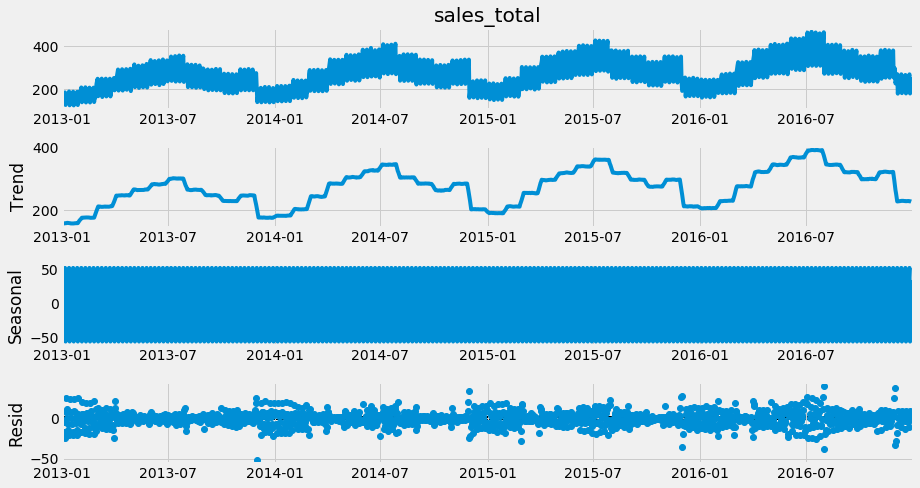

In [14]:
sm.tsa.seasonal_decompose(y).plot()
None

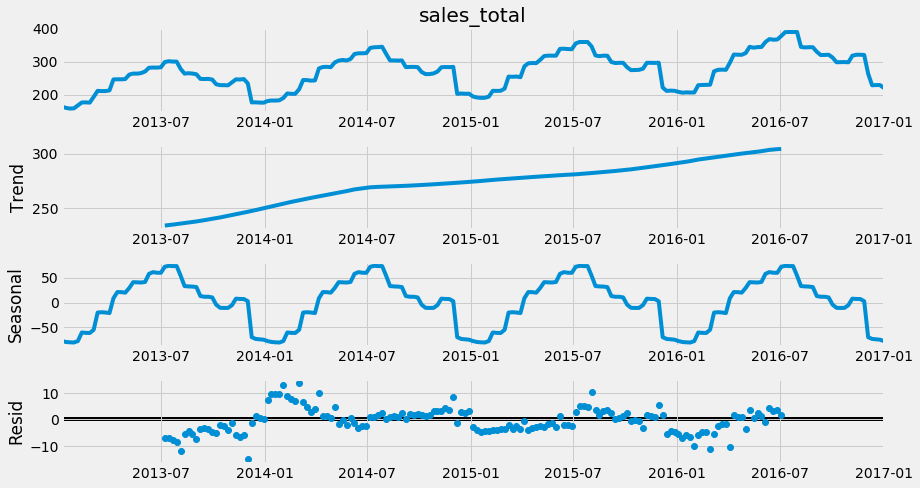

In [15]:
sm.tsa.seasonal_decompose(weekly).plot()
None

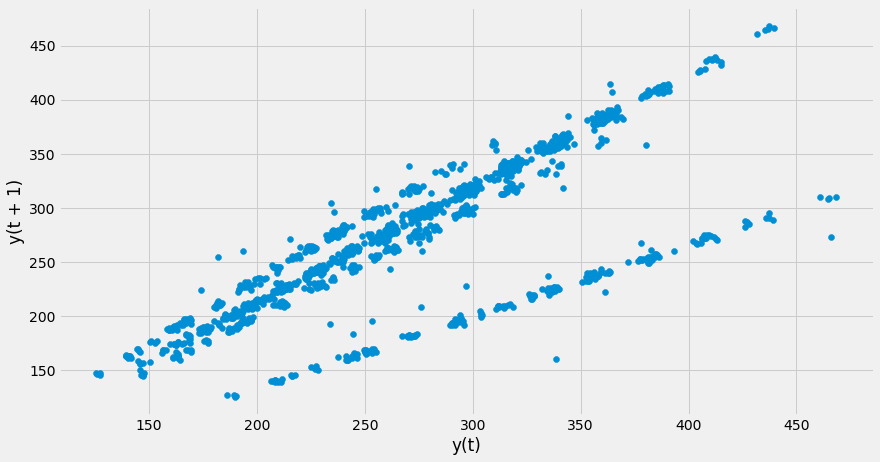

In [16]:
pd.plotting.lag_plot(y)

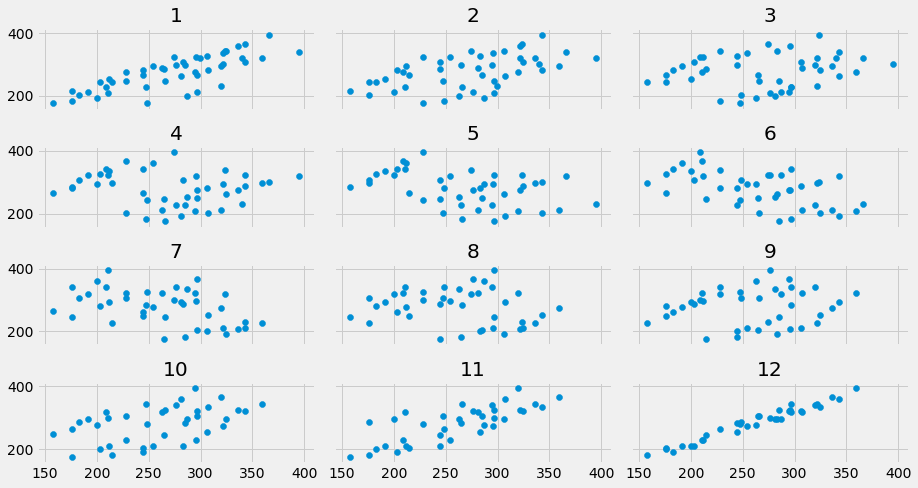

In [17]:
fig, axs = plt.subplots(4, 3, sharex=True, sharey=True)
for ax, lag in zip(axs.ravel(), range(1, 13)):
    pd.plotting.lag_plot(monthly, lag=lag, ax=ax)
    ax.set(title=lag, xlabel='', ylabel='')
fig.tight_layout()

In [18]:
pd.DataFrame({
    'y': y,
    'y(t + 1)': y.shift(-1),
    'y(t + 2)': y.shift(-2)
}).corr()

,y,y(t + 1),y(t + 2)
y,1.000000,0.749055,0.666375
y(t + 1),0.749055,1.000000,0.748436
y(t + 2),0.666375,0.748436,1.000000


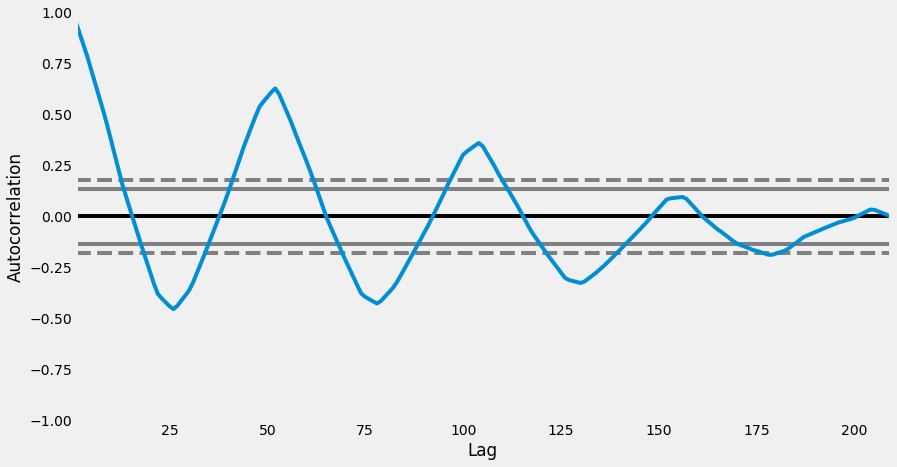

In [19]:
pd.plotting.autocorrelation_plot(weekly)